In [1]:
#Zomato Restaurant Analysis
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#create the dataframe
dataframe = pd.read_csv("zomato.csv")
print(dataframe.head())


   Unnamed: 0.1  Unnamed: 0     restaurant name restaurant type  \
0             0           0        #FeelTheROLL     Quick Bites   
1             1           1          #L-81 Cafe     Quick Bites   
2             2           2             #refuel            Cafe   
3             3           3  '@ Biryani Central   Casual Dining   
4             4           4          '@ The Bbq   Casual Dining   

   rate (out of 5)  num of ratings  avg cost (two people) online_order  \
0              3.4               7                  200.0           No   
1              3.9              48                  400.0          Yes   
2              3.7              37                  400.0          Yes   
3              2.7             135                  550.0          Yes   
4              2.8              40                  700.0          Yes   

  table booking                                      cuisines type  \
0            No                                          Fast Food   
1           

In [5]:
dataframe

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...
7100,7100,7100,Zoey's,Cafe,4.3,894,600.0,Yes,No,"Cafe, Italian, Continental, Burger",Bellandur,Sarjapur Road
7101,7101,7101,ZOROY Luxury Chocolate,Dessert Parlor,4.0,68,250.0,Yes,No,Desserts,Brigade Road,Church Street
7102,7102,7102,Zu's Doner Kebaps,"Takeaway, Delivery",3.7,33,350.0,No,No,"Turkish, Fast Food, Biryani, Chinese",Malleshwaram,RT Nagar
7103,7103,7103,Zyara,Casual Dining,3.8,191,650.0,Yes,No,"North Indian, Mughlai, Chinese",Kammanahalli,HBR Layout


In [19]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [21]:
#rename columns names to make them lower case and replace space with underscore
dataframe.columns=dataframe.columns.str.lower()
dataframe.columns=dataframe.columns.str.replace(' ','_')

In [23]:
dataframe.head(5)

,unnamed:_0.1,unnamed:_0,restaurant_name,restaurant_type,rate_(out_of_5),num_of_ratings,avg_cost_(two_people),online_order,table_booking,cuisines_type,area,local_address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [49]:
dataframe.rename(columns={'unnamed:_0':'order_id'})
dataframe.rename(columns={'rate_(out_of_5)':'rating'})

,unnamed:_0.1,unnamed:_0,restaurant_name,restaurant_type,rating,num_of_ratings,avg_cost_(two_people),online_order,table_booking,cuisines_type,area,local_address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...
7100,7100,7100,Zoey's,Cafe,4.3,894,600.0,Yes,No,"Cafe, Italian, Continental, Burger",Bellandur,Sarjapur Road
7101,7101,7101,ZOROY Luxury Chocolate,Dessert Parlor,4.0,68,250.0,Yes,No,Desserts,Brigade Road,Church Street
7102,7102,7102,Zu's Doner Kebaps,"Takeaway, Delivery",3.7,33,350.0,No,No,"Turkish, Fast Food, Biryani, Chinese",Malleshwaram,RT Nagar
7103,7103,7103,Zyara,Casual Dining,3.8,191,650.0,Yes,No,"North Indian, Mughlai, Chinese",Kammanahalli,HBR Layout


Text(0.5, 0, 'Type of restaurant')

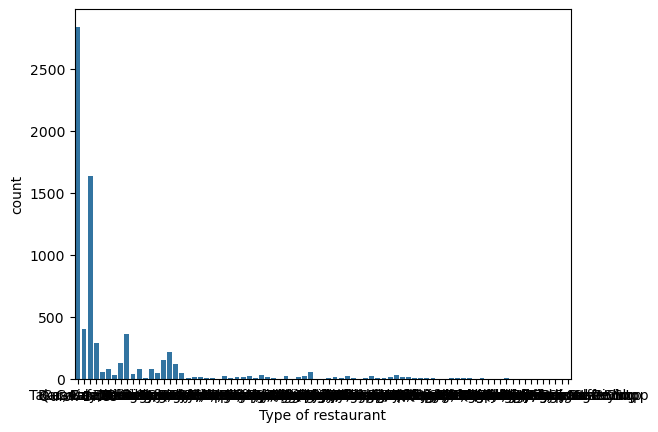

In [27]:
#Type of restaurant
sns.countplot(x=dataframe['restaurant_type'])
plt.xlabel("Type of restaurant")

In [29]:
#how many votes each type of restaurants have received
grouped_data=dataframe.groupby('restaurant_type')['num_of_ratings'].sum()
result= pd.DataFrame({'num_of_rating':grouped_data})


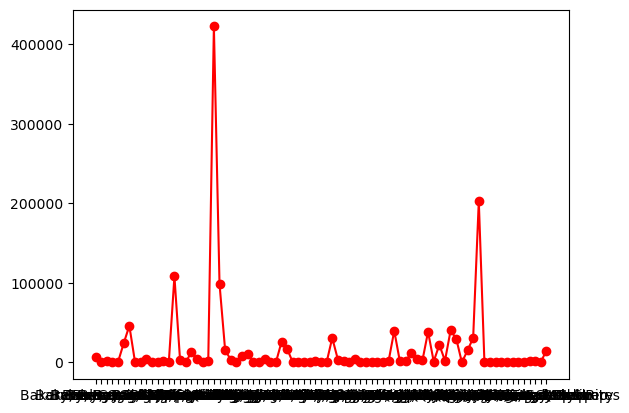

In [45]:
plt.plot(result, c="red" , marker="o")

In [47]:
dataframe.head(5)

,unnamed:_0.1,unnamed:_0,restaurant_name,restaurant_type,rate_(out_of_5),num_of_ratings,avg_cost_(two_people),online_order,table_booking,cuisines_type,area,local_address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [56]:
dataframe.rename(columns={'rate_(out_of_5)':'rating'})

,unnamed:_0.1,unnamed:_0,restaurant_name,restaurant_type,rating,num_of_ratings,avg_cost_(two_people),online_order,table_booking,cuisines_type,area,local_address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...
7100,7100,7100,Zoey's,Cafe,4.3,894,600.0,Yes,No,"Cafe, Italian, Continental, Burger",Bellandur,Sarjapur Road
7101,7101,7101,ZOROY Luxury Chocolate,Dessert Parlor,4.0,68,250.0,Yes,No,Desserts,Brigade Road,Church Street
7102,7102,7102,Zu's Doner Kebaps,"Takeaway, Delivery",3.7,33,350.0,No,No,"Turkish, Fast Food, Biryani, Chinese",Malleshwaram,RT Nagar
7103,7103,7103,Zyara,Casual Dining,3.8,191,650.0,Yes,No,"North Indian, Mughlai, Chinese",Kammanahalli,HBR Layout


In [60]:
dataframe.head(5)

,unnamed:_0.1,unnamed:_0,restaurant_name,restaurant_type,rate_(out_of_5),num_of_ratings,avg_cost_(two_people),online_order,table_booking,cuisines_type,area,local_address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


(array([  33., 1252., 2847., 2534.,  371.]),
 array([1.8 , 2.42, 3.04, 3.66, 4.28, 4.9 ]),
 <BarContainer object of 5 artists>)

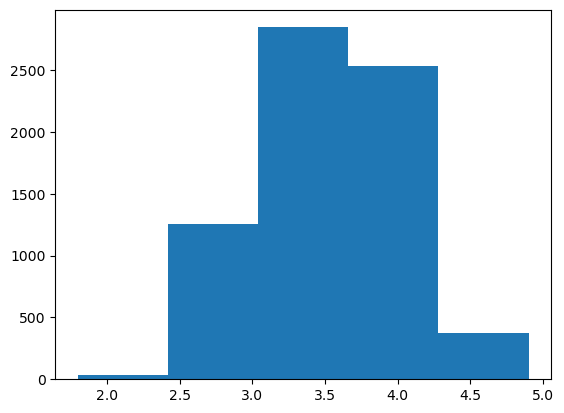

In [62]:
#Majority of rating received
plt.hist(dataframe['rate_(out_of_5)'], bins=5)

<Axes: xlabel='online_order', ylabel='rate_(out_of_5)'>

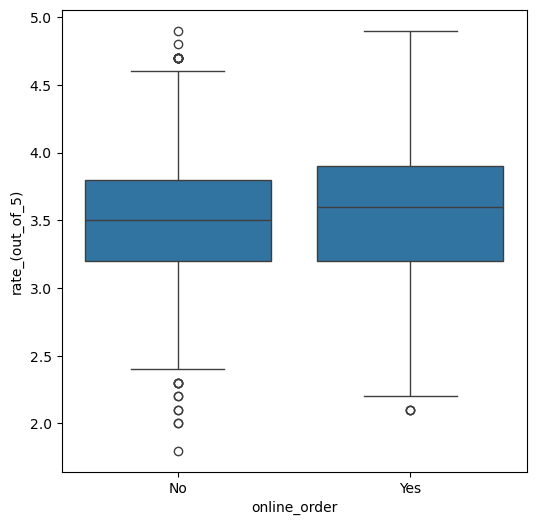

In [66]:
#Which mode has received maximum rating
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order' , y='rate_(out_of_5)' ,data=dataframe)